In [26]:
import pandas as pd 
import numpy as np
import datetime as dt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
%matplotlib inline


In [157]:
df = pd.read_csv('../data/Online-eCommerce.csv')
df

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
0,139374,AP,Adhir Samal,11/1/2020,Delivered,512 GB M.2,SSD,Samsung,6500,8450,1,6500,8450,Ajay Sharma
1,139375,AP,Dannana Jhammi,11/1/2020,Delivered,RYZEN 3rd gen. 3500,CPU,Intel,8500,11050,3,25500,33150,Roshan Kumar
2,139376,AS,Vipin Kumar,11/1/2020,Delivered,2GB Graphic Card,Graphic Card,Nvidia,7000,9100,2,14000,18200,Aarvi Gupta
3,139377,BR,Ranjeet Kumar,11/1/2020,Delivered,16 GB DDR4 RAM,RAM,Hynix,6550,8515,3,19650,25545,Vijay Singh
4,139378,CG,Sajal Singhal,11/1/2020,Order,Standard ATX motherboard,MotherBoard,Gigabyte,7650,9945,4,30600,39780,Aadil Khan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5090,144464,TN,Rahul Kumar Prajapati,31/12/2022,Delivered,406 GB SSD,SSD,Samsung,4500,5850,1,4500,5850,Ajay Sharma
5091,144465,TR,Sagar Jeur,31/12/2022,Shipped,Intel i3 11th gen.,CPU,Intel,8500,11050,4,34000,44200,Roshan Kumar
5092,144466,UK,Rhushikesh Mane,31/12/2022,Order,4GB Graphic card,Graphic Card,Nvidia,12500,16250,2,25000,32500,Aarvi Gupta
5093,144467,UP,Ashish Kumar,31/12/2022,Processing,158 GB DDR4 RAM,RAM,Hynix,3500,4550,2,7000,9100,Vijay Singh


In [22]:
df = df.drop_duplicates()
print("-----Before cleaning----")
print(df.isnull().sum())
df1=df.fillna(0)
print("-----After cleaning----")
print(df1.isnull().sum())

-----Before cleaning----
Order_Number           1
State_Code             1
Customer_Name          1
Order_Date             1
Status                 1
Product                1
Category               1
Brand                  1
Cost                   1
Sales                  1
Quantity               1
Total_Cost             1
Total_Sales            1
Assigned Supervisor    1
dtype: int64
-----After cleaning----
Order_Number           0
State_Code             0
Customer_Name          0
Order_Date             0
Status                 0
Product                0
Category               0
Brand                  0
Cost                   0
Sales                  0
Quantity               0
Total_Cost             0
Total_Sales            0
Assigned Supervisor    0
dtype: int64


In [31]:
#profit from each row
df1['profit']=df1['Total_Sales']-df1['Total_Cost']
profit_df = df1[['profit']].copy()


In [39]:
# Step 1: Calculate profit
df['Profit'] = df['Total_Sales'] - df['Total_Cost']

# Step 2: Parse 'Order_Date' with correct format
df['Year_Month'] = pd.to_datetime(df['Order_Date'], dayfirst=True).dt.to_period('M')

# Step 3: Group by State and Year-Month, and sum profits
profit_by_state_year_month = df.groupby(['State_Code', 'Year_Month'])['Profit'].sum().reset_index()

# Rename columns for clarity
profit_by_state_year_month.columns = ['State_Code', 'Year_Month', 'Total_Profit']

# Display the resulting dataframe
print(profit_by_state_year_month)


     State_Code Year_Month  Total_Profit
0            AN    2020-01          1035
1            AN    2020-02          3000
2            AN    2020-03         13422
3            AN    2020-06          4350
4            AN    2020-07         12600
...         ...        ...           ...
1007         WB    2022-08          3750
1008         WB    2022-09         23760
1009         WB    2022-10           585
1010         WB    2022-11          7812
1011         WB    2022-12         37800

[1012 rows x 3 columns]


In [45]:
customer_sales = df1.groupby('Customer_Name')['Total_Sales'].sum().reset_index()

# Eliminate the 0th index row
customer_sales = customer_sales.iloc[1:].reset_index(drop=True)

# Display the updated DataFrame
print(customer_sales)

              Customer_Name  Total_Sales
0               Adhir Samal    2751814.0
1            Aditya Agarwal    2598635.0
2                Ajay Mehta       3380.0
3               Ajay Sharma    2551588.0
4            Akhilesh Kumar    1955044.0
5                Amit Singh    2753348.0
6        Aniruddha Kekapure    2091596.0
7              Ashish Kumar    1941225.0
8             Ashish Pandey    2091154.0
9            Ashwini Adsare    2757859.0
10               Aslam Raza    2740777.0
11            Atif Siddiqui    1866852.0
12                 Bijendra    1983254.0
13              Binod Kumar      65260.0
14        Chandrakant Kasbe    1863810.0
15           Dannana Jhammi    2009540.0
16             Dilip Rathod       4368.0
17           Firdoush Jabee    2050178.0
18           Haridas Balraj    1868256.0
19                  Jagdeep    1809847.0
20           Jagjeet Variya      10725.0
21             Javed Akhter    2731963.0
22        Jay Prakash Kumar    2734212.0
23           Jig

In [57]:
df1['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce', dayfirst=True)
#succesfully coverted
print(df1['Order_Date'].dtype)
comparison_date = pd.to_datetime('2023-1-5')
comparison_date

datetime64[ns]


Timestamp('2023-01-05 00:00:00')

In [67]:
rfm_table =df1.groupby([df1['Customer_Name']]).agg({'Order_Date': lambda date : (comparison_date - date.max()).days,
                                                            'Order_Number' : 'count', 
                                                            'Total_Cost' : sum})
rfm_table = rfm_table.iloc[1:]



In [69]:
# replacing the name of columns
rfm_table.rename(columns={'Order_Date':'Recency','Order_Number':'Frequency','Total_Cost':'Monetary'},inplace=True)

In [79]:
# divides customers into three categories
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles 
rfmSegmentation = rfm_table

In [81]:
#  two classes for the RFM segmentation since, being high recency is bad, while high frequency and monetary value is good.
def Rclass(x,p,d):
    if x<=d[p][0.25]:
        return 1;
    elif  x<=d[p][0.50]:
        return 2;
    elif  x<=d[p][0.75]:
         return 3;
    else:
        return 4

def FMClass(x,p,d):
    if x<=d[p][0.25]:
        return 4;
    elif  x<=d[p][0.50]:
         return 3;
    elif  x<=d[p][0.75]:
         return 2;
    else:
        return 1

In [83]:
rfmSegmentation['R_Quartile']=rfmSegmentation['Recency'].apply(Rclass, args=('Recency',quantiles,))
rfmSegmentation['F_Quartile']=rfmSegmentation['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfmSegmentation['M_Quartile']=rfmSegmentation['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

In [91]:
rfmSegmentation['Rfm_score'] = 100*rfmSegmentation['R_Quartile'].astype(int)+10*rfmSegmentation['F_Quartile'].astype(int)+rfmSegmentation['M_Quartile'].astype(int)
rfmSegmentation['Customer_Type']=pd.qcut(rfmSegmentation['Rfm_score'],3,['Window shoppers','Occasional shoppers','Powerful shoppers'])
#its multiplied by 100,10,1 becouse recency is more important if recency is 1=100 monetary is 1=10 frequency is 1=1 so rfm score wauld be=121
rfmSegmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,Rfm_score,Customer_Type
Customer_Name,,,,,,,,
Adhir Samal,5,122,2116780.0,1,1,1,111,Window shoppers
Aditya Agarwal,5,121,1998950.0,1,3,2,132,Occasional shoppers
Ajay Mehta,1022,1,2600.0,4,4,4,444,Powerful shoppers
Ajay Sharma,5,121,1962760.0,1,3,2,132,Occasional shoppers
Akhilesh Kumar,5,122,1503880.0,1,1,3,113,Window shoppers
Amit Singh,5,120,2117960.0,1,3,1,131,Window shoppers
Aniruddha Kekapure,5,121,1608920.0,1,3,2,132,Occasional shoppers
Ashish Kumar,5,121,1493250.0,1,3,3,133,Occasional shoppers
Ashish Pandey,5,120,1608580.0,1,3,2,132,Occasional shoppers


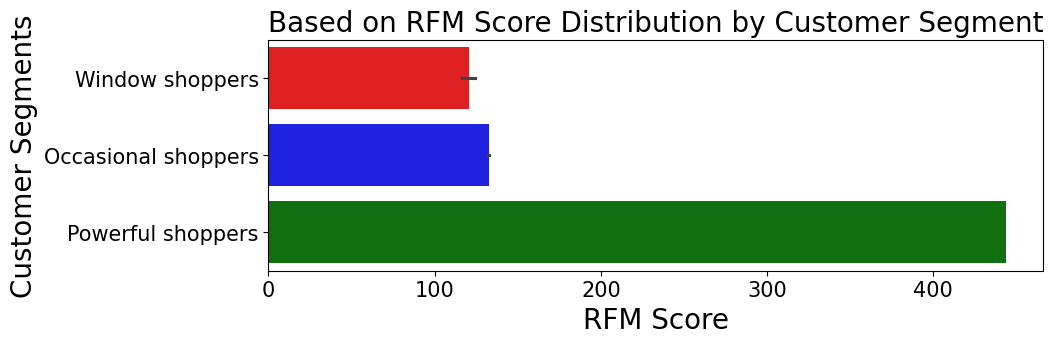

In [113]:
segment_colors = {'Window shoppers': 'red', 'Powerful shoppers': 'green', 'Occasional shoppers': 'blue'}

plt.figure(figsize=(10, 3))
sns.barplot(y='Customer_Type', x='Rfm_score', data=rfmSegmentation, palette=segment_colors)
plt.ylabel('Customer Segments', fontsize=20)
plt.xlabel('RFM Score', fontsize=20)
plt.title('Based on RFM Score Distribution by Customer Segment', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


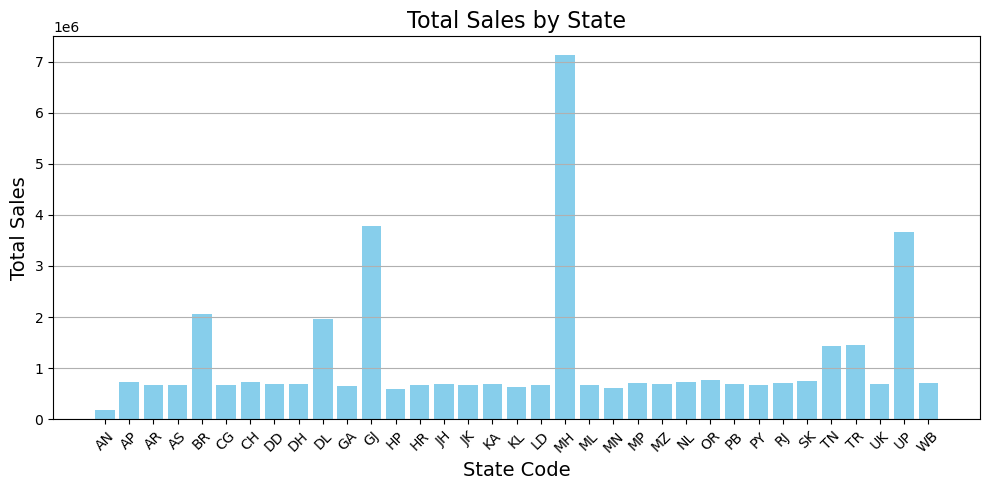

In [119]:
state_sales=df.groupby('State_Code')['Sales'].sum()
state_sales_df = state_sales.reset_index(name='Total_Sales')

plt.figure(figsize=(10, 5))
plt.bar(state_sales_df['State_Code'], state_sales_df['Total_Sales'], color='skyblue')
plt.title('Total Sales by State', fontsize=16)
plt.xlabel('State Code', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

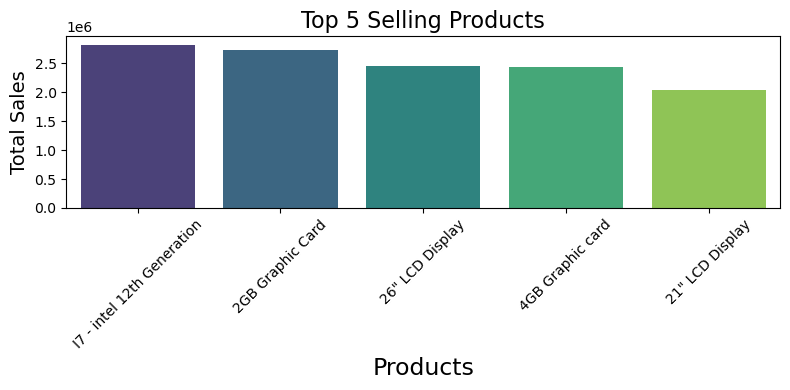

In [127]:
product_sales=df.groupby('Product')['Sales'].sum()
top_5_selling_products = product_sales.nlargest(5)
top_5_selling_products = top_5_selling_products.reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='Product', y='Sales', data=top_5_selling_products, palette='viridis')
plt.title('Top 5 Selling Products', fontsize=16)
plt.xlabel('Products', fontsize=17)
plt.ylabel('Total Sales', fontsize=14)  # Adjust ylabel accordingly if you used 'Sales'
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

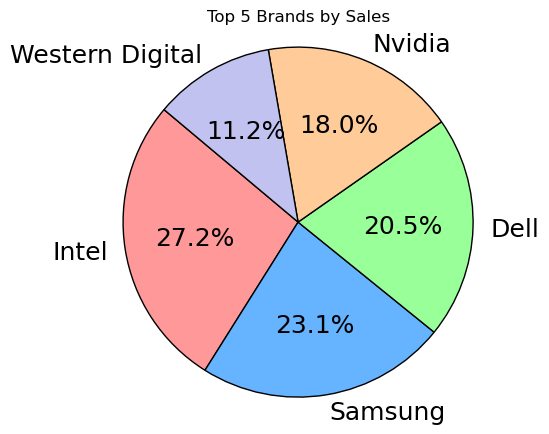

In [133]:
Top_brands=df.groupby('Brand')['Sales'].sum()
Top_5_brands=Top_brands.nlargest(5)
plt.figure(figsize=(6, 5))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
plt.pie(Top_5_brands, labels=Top_5_brands.index, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 18},colors=colors,wedgeprops=dict(edgecolor='black'))
plt.title('Top 5 Brands by Sales')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

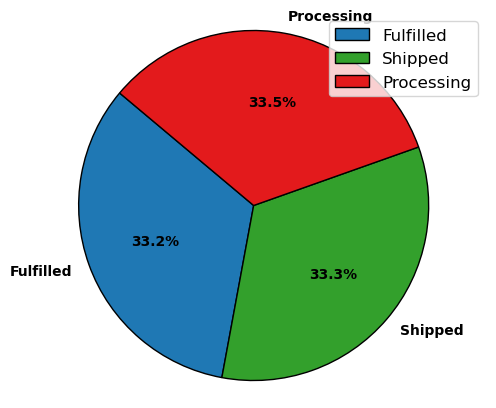

In [147]:
total_orders = len(df)
fulfilled_orders = len(df[df['Status'] == 'Delivered'])
fulfillment_rate = (fulfilled_orders / total_orders) * 100


Shipped_orders = len(df[df['Status'] == 'Shipped'])
Shipped_rate = (Shipped_orders / total_orders) * 100

Processing_orders = len(df[df['Status'] == 'Processing'])
Processing_rate = (Processing_orders / total_orders) * 100

data = {
    'Metric': [  'Fulfillment Rate', 'Shipped Rate', 'Processing Rate'],
    'Value': [ fulfillment_rate,  Shipped_rate, Processing_rate]
}

labels = ['Fulfilled', 'Shipped', 'Processing']
sizes = [fulfilled_orders, Shipped_orders, Processing_orders]
colors = ['#1f78b4', '#33a02c', '#e31a1c']  # Dark colors
# Plotting the pie chart
plt.figure(figsize=(6, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors,textprops={'fontsize': 10,'fontweight': 'bold'},wedgeprops=dict(edgecolor='black'))
# Move the legend to the center right
plt.legend( fontsize=12)
# Ensure the pie chart is a circle
plt.axis('equal')
plt.show()


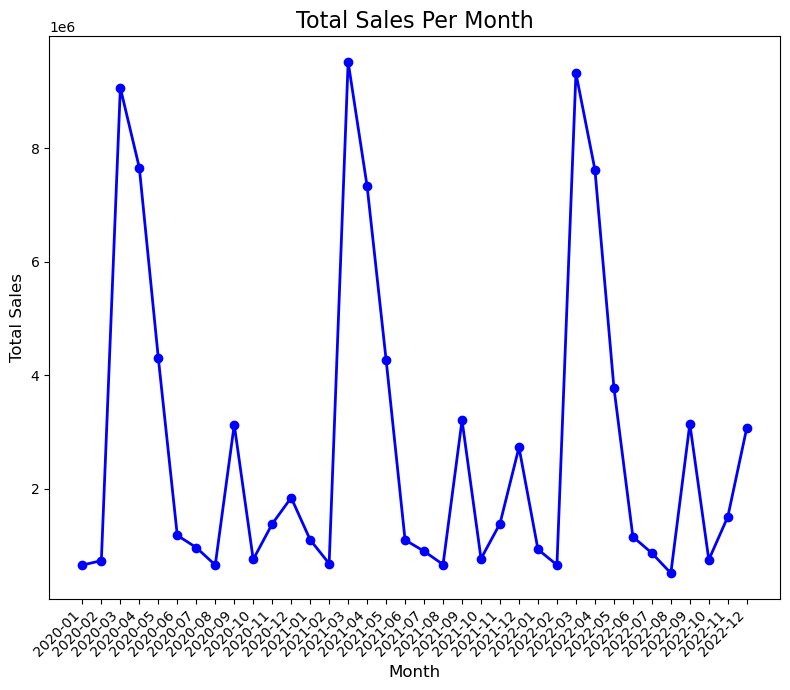

In [155]:
# Converting the 'Order_Date' column to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d/%m/%Y')

# Extracting the month and year
df['YearMonth'] = df['Order_Date'].dt.to_period('M')

# Calculating total sales for each month
monthly_sales = df.groupby('YearMonth')['Total_Sales'].sum().reset_index()

# Sorting by YearMonth for proper chronological order
monthly_sales = monthly_sales.sort_values('YearMonth')

# Plotting the total sales over time
plt.figure(figsize=(8,7))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['Total_Sales'], marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

# Adding title and labels
plt.title('Total Sales Per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()


